In [1]:
import pm4py
import sys
sys.path.append('../../TaskExecutionTimeMining/')
from event_log_transformer import *
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', 200)


In [2]:
file_path = '../../../data/BPI Challenge 2017.xes'
event_log = pm4py.read_xes(file_path)

parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

In [3]:
event_log

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202262,Deleted,User_1,W_Call after offers,Workflow,Workitem_1817549786,ate_abort,2017-01-06 06:33:02.212000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202263,Created,User_1,W_Call after offers,Workflow,Workitem_363876066,schedule,2017-01-06 06:33:02.221000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202264,statechange,User_28,A_Cancelled,Application,ApplState_1869071797,complete,2017-01-16 09:51:21.114000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202265,statechange,User_28,O_Cancelled,Offer,OfferState_420066181,complete,2017-01-16 09:51:21.139000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1580299144


In [4]:
#event_log['concept'] = event_log['concept:name'] + '_' + event_log['lifecycle:transition']
#event_log = event_log[event_log['concept:name'].str.startswith('W_')]

In [5]:
#event_log[:99999].to_csv('test.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')

In [6]:
event_log['lifecycle:transition'].unique()

array(['complete', 'schedule', 'withdraw', 'start', 'suspend',
       'ate_abort', 'resume'], dtype=object)

In [7]:
event_log['concept:name'].unique()

array(['A_Create Application', 'A_Submitted', 'W_Handle leads',
       'W_Complete application', 'A_Concept', 'A_Accepted',
       'O_Create Offer', 'O_Created', 'O_Sent (mail and online)',
       'W_Call after offers', 'A_Complete', 'W_Validate application',
       'A_Validating', 'O_Returned', 'W_Call incomplete files',
       'A_Incomplete', 'O_Accepted', 'A_Pending', 'A_Denied', 'O_Refused',
       'O_Cancelled', 'A_Cancelled', 'O_Sent (online only)',
       'W_Assess potential fraud', 'W_Personal Loan collection',
       'W_Shortened completion '], dtype=object)

In [8]:
start_end_event_log = TransformEventLog.start_end_event_log_mult(event_log,
                                                                   start_name_1 = 'start',
                                                                   start_name_2 = 'resume',
                                                                 
                                                                   complete_name_3 = 'suspend',
                                                                   complete_name_1 = 'complete',
                                                                   complete_name_2 = 'ate_abort'
                                                                )

/home/michel/Documents/TaskExecutionTimeMining/src/notebooks/BPIC_2017/../../TaskExecutionTimeMining/event_log_transformer.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_end_event_log.loc[:, 'duration'] = start_end_event_log[timestamp_name + complete_name_gen] - start_end_event_log[timestamp_name + start_name_gen]
/home/michel/Documents/TaskExecutionTimeMining/src/notebooks/BPIC_2017/../../TaskExecutionTimeMining/event_log_transformer.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_en

In [9]:
start_end_event_log.groupby(['lifecycle:transition_start', 'lifecycle:transition_complete']).count()

Action_start  \
lifecycle:transition_start lifecycle:transition_complete                 
resume                     complete                              21570   
                           suspend                              105590   
start                      complete                              20739   
                           suspend                              107488   

                                                          org:resource_start  \
lifecycle:transition_start lifecycle:transition_complete                       
resume                     complete                                    21570   
                           suspend                                    105590   
start                      complete                                    20739   
                           suspend                                    107488   

                                                          concept:name  \
lifecycle:transition_start lifecycle:transition_complete                 
resume                     complete                              21570   
                           suspend                              105590   
start                      complete                              20739   
                           suspend                              107488   

                                                          EventOrigin_start  \
lifecycle:transition_start lifecycle:transition_complete                      
resume                     complete                                   21570   
                           suspend                                   105590   
start                      complete                                   20739   
                           suspend                                   107488   

                                                          EventID_start  \
lifecycle:transition_start lifecycle:transition_complete                  
resume                     complete                               21570   
                           suspend                               105590   
start                      complete                               20739   
                           suspend                               107488   

                                                          time:timestamp_start  \
lifecycle:transition_start lifecycle:transition_complete                         
resume                     complete                                      21570   
                           suspend                                      105590   
start                      complete                                      20739   
                           suspend                                      107488   

                                                          case:LoanGoal_start  \
lifecycle:transition_start lifecycle:transition_complete                        
resume                     complete                                     21570   
                           suspend                                     105590   
start                      complete                                     20739   
                           suspend                                     107488   

                                                          case:ApplicationType_start  \
lifecycle:transition_start lifecycle:transition_complete                               
resume                     complete                                            21570   
                           suspend                                            105590   
start                      complete                                            20739   
                           suspend                                            107488   

                                                          case:concept:name  \
lifecycle:transition_start lifecycle:transition_complete                      
resume                     complete                                   21570   
               

In [10]:
(start_end_event_log['duration_seconds']).describe()

count    255387.000000
mean        350.867352
std        1647.674392
min           0.445000
25%          27.999000
50%          98.013000
75%         286.019000
max       68841.233000
Name: duration_seconds, dtype: float64

<Axes: >

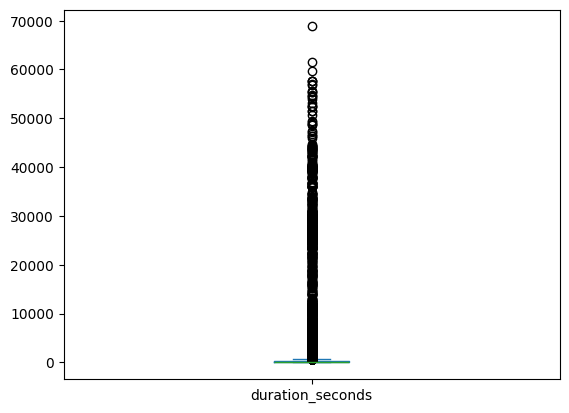

In [11]:
(start_end_event_log['duration_seconds']).plot.box()

In [12]:
start_end_event_log[start_end_event_log['case:concept:name'] == 'Application_1283264254'].sort_values('time:timestamp_start')

,Action_start,org:resource_start,concept:name,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:concept:name,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,Action_complete,org:resource_complete,EventOrigin_complete,EventID_complete,lifecycle:transition_complete,time:timestamp_complete,case:LoanGoal_complete,case:ApplicationType_complete,case:RequestedAmount_complete,FirstWithdrawalAmount_complete,NumberOfTerms_complete,Accepted_complete,MonthlyCost_complete,Selected_complete,CreditScore_complete,OfferedAmount_complete,OfferID_complete,duration,duration_seconds
4372158,Obtained,User_38,W_Handle leads,Workflow,Workitem_1104763209,start,2016-07-04 10:20:10.415000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_38,Workflow,Workitem_420687419,complete,2016-07-04 10:21:41.308000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:30.893000,90.893
4372170,Obtained,User_38,W_Complete application,Workflow,Workitem_8871400,start,2016-07-04 10:21:41.324000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,User_38,Workflow,Workitem_1814789488,suspend,2016-07-04 10:21:47.405000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.081000,6.081
4372185,Obtained,User_3,W_Complete application,Workflow,Workitem_1619472271,resume,2016-07-04 14:00:32.677000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,User_3,Workflow,Workitem_408996015,suspend,2016-07-04 14:01:44.304000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:11.627000,71.627
4372211,Obtained,User_46,W_Call after offers,Workflow,Workitem_1996948036,start,2016-07-06 07:33:02.258000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,User_46,Workflow,Workitem_2051903293,suspend,2016-07-06 07:36:17.555000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:03:15.297000,195.297
4372226,Obtained,User_45,W_Call after offers,Workflow,Workitem_87520937,resume,2016-07-12 07:31:43.246000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,User_45,Workflow,Workitem_1074872410,suspend,2016-07-12 07:32:10.336000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:27.090000,27.090
4372251,Obtained,User_121,W_Validate application,Workflow,Workitem_1152951605,start,2016-07-27 12:57:39.089000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_121,Workflow,Workitem_71337467,complete,2016-07-27 12:59:22.602000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:43.513000,103.513
4372314,Obtained,User_121,W_Call incomplete files,Workflow,Workitem_1931841348,start,2016-07-27 12:59:22.622000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,User_121,Workflow,Workitem_36060659,suspend,2016-07-27 13:00:46.127000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:23.505000,83.505
4372402,Obtained,User_15,W_Call incomplete files,Workflow,Workitem_807241276,resume,2016-07-27 13:50:14.373000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,User_15,Workflow,Workitem_1468282086,suspend,2016-07-27 14:01:22.965000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:11:08.592000,

In [13]:
# remove cases with overlapping activities

overlapping_count = 0
for case_id in start_end_event_log['case:concept:name'].unique():
    selected_log = start_end_event_log[start_end_event_log['case:concept:name'] == case_id].sort_values('time:timestamp_start')
    selected_log['interval'] = pandas.IntervalIndex.from_arrays(selected_log['time:timestamp_start'], selected_log['time:timestamp_complete'])
    
    activities = list(selected_log['concept:name'])
    #print(activities)
    case = []
    print_case = False
    do_not_process = []
    for index, row in selected_log.iterrows():
        if index in do_not_process:
            continue
        #print(row['concept:name'], activities)
        interlapping = [row['concept:name']]
        activities.remove(row['concept:name'])
        for index_2, row_2 in selected_log.loc[index:].iterrows():
            if index == index_2:
                continue
            if row['interval'].overlaps(row_2['interval']):
                activities.remove(row_2['concept:name'])
                interlapping.append(row_2['concept:name'])
                do_not_process.append(index_2)
                if row['concept:name'] != row_2['concept:name']: #and \
                    #(row_2['concept:name'] == 'W_Shortened completion ' or row['concept:name'] == 'W_Shortened completion '):
                    print_case = True
        case.append(interlapping)
    if print_case:
        overlapping_count += 1
        print(case_id)
        print(case)
        start_end_event_log = start_end_event_log[~(start_end_event_log['case:concept:name'] == case_id)]
print(overlapping_count)

Application_323493054
[['W_Handle leads'], ['W_Handle leads'], ['W_Handle leads'], ['W_Complete application'], ['W_Complete application'], ['W_Call after offers', 'W_Shortened completion '], ['W_Call after offers']]
Application_1105196432
[['W_Complete application'], ['W_Complete application'], ['W_Complete application'], ['W_Complete application', 'W_Shortened completion '], ['W_Call after offers'], ['W_Call after offers'], ['W_Validate application'], ['W_Validate application'], ['W_Call incomplete files'], ['W_Call incomplete files'], ['W_Validate application']]
Application_1800420607
[['W_Complete application', 'W_Shortened completion '], ['W_Call after offers'], ['W_Call after offers'], ['W_Validate application'], ['W_Call incomplete files'], ['W_Call incomplete files'], ['W_Call incomplete files'], ['W_Validate application']]
Application_985494596
[['W_Complete application'], ['W_Call after offers', 'W_Shortened completion '], ['W_Call after offers'], ['W_Call after offers'], ['W_

In [14]:
start_end_event_log[start_end_event_log['concept:name'] == 'W_Shortened completion '].shape

(23, 38)

In [15]:
print(case_id)

Application_1829767138


In [16]:
start_end_event_log['case:concept:name'].nunique()

31443

In [17]:
start_end_event_log[start_end_event_log['case:concept:name'] == 'Application_912911968'].sort_values('time:timestamp_start')

,Action_start,org:resource_start,concept:name,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:concept:name,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,Action_complete,org:resource_complete,EventOrigin_complete,EventID_complete,lifecycle:transition_complete,time:timestamp_complete,case:LoanGoal_complete,case:ApplicationType_complete,case:RequestedAmount_complete,FirstWithdrawalAmount_complete,NumberOfTerms_complete,Accepted_complete,MonthlyCost_complete,Selected_complete,CreditScore_complete,OfferedAmount_complete,OfferID_complete,duration,duration_seconds


In [18]:
start_end_event_log[start_end_event_log['case:concept:name'] == 'Application_912911968'].sort_values('time:timestamp_start')\
[['org:resource_start', 	'concept:name', 'lifecycle:transition_start', 'time:timestamp_start', 'time:timestamp_complete']]

,org:resource_start,concept:name,lifecycle:transition_start,time:timestamp_start,time:timestamp_complete


In [19]:
event_log[event_log['case:concept:name'] == 'Application_912911968'].sort_values('time:timestamp')

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
579932,Created,User_1,A_Create Application,Application,Application_912911968,complete,2016-07-05 18:30:43.350000+00:00,Existing loan takeover,New credit,Application_912911968,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579933,statechange,User_1,A_Submitted,Application,ApplState_742150333,complete,2016-07-05 18:30:43.404000+00:00,Existing loan takeover,New credit,Application_912911968,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579934,Created,User_1,W_Handle leads,Workflow,Workitem_1381085397,schedule,2016-07-05 18:30:43.876000+00:00,Existing loan takeover,New credit,Application_912911968,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579935,Deleted,User_1,W_Handle leads,Workflow,Workitem_2080137421,withdraw,2016-07-05 18:32:08.668000+00:00,Existing loan takeover,New credit,Application_912911968,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579936,Created,User_1,W_Complete application,Workflow,Workitem_711298235,schedule,2016-07-05 18:32:08.684000+00:00,Existing loan takeover,New credit,Application_912911968,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579937,statechange,User_1,A_Concept,Application,ApplState_1050161913,complete,2016-07-05 18:32:08.689000+00:00,Existing loan takeover,New credit,Application_912911968,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579938,Obtained,User_43,W_Complete application,Workflow,Workitem_780376425,start,2016-07-08 08:04:20.892000+00:00,Existing loan takeover,New credit,Application_912911968,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579939,Created,User_43,W_Shortened completion,Workflow,Workitem_2147321756,schedule,2016-07-08 08:05:07.562000+00:00,Existing loan takeover,New credit,Application_912911968,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579940,Obtained,User_43,W_Shortened completion,Workflow,Workitem_479408350,start,2016-07-08 08:05:07.563000+00:00,Existing loan takeover,New credit,Application_912911968,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579941,Released,User_43,W_Complete application,Workflow,Workitem_986425809,suspend,2016-07-08 08:06:10.261000+00:00,Existing loan takeover,New credit,Application_912911968,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Seconds in day
start_end_event_log = TransformEventLog.seconds_in_day(start_end_event_log, 'time:timestamp_start')
# day of week
start_end_event_log = TransformEventLog.day_of_week(start_end_event_log, 'time:timestamp_start')

In [21]:
start_end_event_log

,Action_start,org:resource_start,concept:name,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:concept:name,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,Action_complete,org:resource_complete,EventOrigin_complete,EventID_complete,lifecycle:transition_complete,time:timestamp_complete,case:LoanGoal_complete,case:ApplicationType_complete,case:RequestedAmount_complete,FirstWithdrawalAmount_complete,NumberOfTerms_complete,Accepted_complete,MonthlyCost_complete,Selected_complete,CreditScore_complete,OfferedAmount_complete,OfferID_complete,duration,duration_seconds,seconds_in_day
6776886,Obtained,User_80,W_Call after offers,Workflow,Workitem_1000013868,start,2016-10-18 08:54:52.604000+00:00,Car,New credit,Application_1804686886,6500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,User_80,Workflow,Workitem_282145227,suspend,2016-10-18 08:57:35.834000+00:00,Car,New credit,6500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:02:43.230000,163.230,32092
244643,Obtained,User_114,W_Validate application,Workflow,Workitem_1000015916,start,2016-01-19 12:58:12.261000+00:00,Car,New credit,Application_704665572,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,User_114,Workflow,Workitem_363314289,suspend,2016-01-19 13:01:59.549000+00:00,Car,New credit,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:03:47.288000,227.288,46692
7696421,Obtained,User_51,W_Call incomplete files,Workflow,Workitem_1000016777,resume,2016-12-01 19:01:26.846000+00:00,Home improvement,New credit,Application_907188218,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,User_51,Workflow,Workitem_679245376,suspend,2016-12-01 19:04:53.209000+00:00,Home improvement,New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:03:26.363000,206.363,68486
833070,Obtained,User_5,W_Call after offers,Workflow,Workitem_1000019350,resume,2016-02-13 15:34:25.947000+00:00,Home improvement,New credit,Application_2110398373,8500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,User_5,Workflow,Workitem_365997120,suspend,2016-02-13 15:34:35.927000+00:00,Home improvement,New credit,8500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:09.980000,9.980,56065
3680546,Obtained,User_61,W_Call incomplete files,Workflow,Workitem_1000021441,resume,2016-06-20 14:00:07.911000+00:00,Home improvement,New credit,Application_463742835,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,User_61,Workflow,Workitem_835600192,suspend,2016-06-20 14:02:24.019000+00:00,Home improvement,New credit,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:02:16.108000,136.108,50407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507290,Obtained,User_112,W_Validate application,Workflow,Workitem_99990472,start,2016-05-02 10:19:49.618000+00:00,Not speficied,New credit,Application_422800640,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,User_112,Workflow,Workitem_1738241612,suspend,2016-05-02 10:21:22.923000+00:00,Not speficied,New credit,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:33.305000,93.305,37189
6571590,Obtained,User_131,W_Validate application,Workflow,Workitem_999916513,start,2016-10-18 07:50:28.148000+00:00,Home improvement,New credit,Application_480209137,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,User_131,Workflow,Workitem_616491584,suspend,2016-10-18 07:50:41.170000+00:00,Home improvement,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:13.022000,13.022,28228
7043295,Obtained,User_67,W_Call incomplete files,Workflow,Workitem_999954965,resume,2016-11-16 08:03:14.217000+00:00,Existing loan takeover,New credit,Application_1864868732,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,User_67,Workflow,Workitem_626276716,suspend,2016-11-16 08:05:17.042000+00:00,Existing loan takeover,New credit,25

In [22]:
#start_end_event_log[(start_end_event_log['case:concept:name'] == 'Application_949646433')].sort_values('time:timestamp_start')\
#[['case:concept:name', 'concept:name', 'org:resource_start', 'lifecycle:transition_start', 'time:timestamp_start', 'org:resource_complete', 'lifecycle:transition_complete', 'time:timestamp_complete', 'duration_seconds']]

In [23]:
# Resource counts

resource_count_event_log = TransformEventLog.value_count_per_case(start_end_event_log, 'org:resource_start',
                                                                  timestamp_name = 'time:timestamp_start',
                                                                 lifecycle_col_name = 'lifecycle:transition_start')

/home/michel/Documents/TaskExecutionTimeMining/src/notebooks/BPIC_2017/../../TaskExecutionTimeMining/event_log_transformer.py:136: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  value_count_event_log = value_count_event_log.fillna(0)


In [24]:
resource_count_event_log

,Action_start,org:resource_start,concept:name,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:concept:name,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,Action_complete,org:resource_complete,EventOrigin_complete,EventID_complete,lifecycle:transition_complete,time:timestamp_complete,case:LoanGoal_complete,case:ApplicationType_complete,case:RequestedAmount_complete,FirstWithdrawalAmount_complete,NumberOfTerms_complete,Accepted_complete,MonthlyCost_complete,Selected_complete,CreditScore_complete,OfferedAmount_complete,OfferID_complete,duration,duration_seconds,seconds_in_day,User_10,User_100,User_101,User_102,User_103,User_104,User_105,User_106,User_107,User_108,User_109,User_11,User_110,User_111,User_112,User_113,User_114,User_115,User_116,User_117,User_118,User_119,User_12,User_120,User_121,User_122,User_123,User_124,User_125,User_126,User_127,User_128,User_129,User_13,User_130,User_131,User_132,User_133,User_134,User_135,User_136,User_137,User_138,User_139,User_14,User_140,User_141,User_142,User_143,User_144,User_145,User_146,User_147,User_148,User_149,User_15,User_16,User_17,User_18,User_19,User_2,User_20,User_21,User_22,User_23,User_24,User_25,User_26,User_27,User_28,User_29,User_3,User_30,User_31,User_32,User_33,User_34,User_35,User_36,User_37,User_38,User_39,User_4,User_40,User_41,User_42,User_43,User_44,User_45,User_46,User_47,User_48,User_49,User_5,User_50,User_51,User_52,User_53,User_54,User_55,User_56,User_57,User_58,User_59,User_6,User_60,User_61,User_62,User_63,User_64,User_65,User_66,User_67,User_68,User_69,User_7,User_70,User_71,User_72,User_73,User_74,User_75,User_76,User_77,User_78,User_79,User_8,User_80,User_81,User_82,User_83,User_84,User_85,User_86,User_87,User_88,User_89,User_9,User_90,User_91,User_92,User_93,User_94,User_95,User_96,User_97,User_98,User_99
0,Obtained,User_80,W_Call after offers,Workflow,Workitem_1000013868,start,2016-10-18 08:54:52.604000+00:00,Car,New credit,Application_1804686886,6500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Released,User_80,Workflow,Workitem_282145227,suspend,2016-10-18 08:57:35.834000+00:00,Car,New credit,6500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 00:02:43.230000,163.230,32092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Obtained,User_114,W_Validate application,Workflow,Workitem_1000015916,start,2016-01-19 12:58:12.261000+00:00,Car,New credit,Application_704665572,15000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Released,User_114,Workflow,Workitem_363314289,suspend,2016-01-19 13:01:59.549000+00:00,Car,New credit,15000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 00:03:47.288000,227.288,46692,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Obtained,User_51,W_Call incomplete files,Workflow,Workitem_1000016777,resume,2016-12-01 19:01:26.846000+00:00,Home improvement,New credit,Application_907188218,5000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Released,User_51,Workflow,Workitem_679245376,suspend,2016-12-01 19:04:53.209000+00:00,Home improvement,New credit,5000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 00:03:26.363000,206.363,68486,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
3,Obtained,

In [ ]:
activity_count_event_log = TransformEventLog.value_count_per_case(resource_count_event_log, 'concept:name',
                                                                  timestamp_name = 'time:timestamp_start',
                                                                 lifecycle_col_name = 'lifecycle:transition_start' )

In [ ]:
activity_count_event_log

In [ ]:
activity_count_event_log.to_csv('../transformed_event_logs/BPIC_2017_resume_suspend.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')
activity_count_event_log.to_pickle('../transformed_event_logs/BPIC_2017_resume_suspend.pickle')